In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP, MLPManual
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_type = "Binary Cross Entropy"
loss_fn = torch.nn.BCELoss()

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### For k = 1

In [8]:
k=1
model = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList_Ada1, trainAccList_Ada1, valLossList_Ada1, valAccList_Ada1  = train_model(model, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None, updateWManually=False)


Training on cuda:0
Epoch 1 completed. Loss - total: 16355.1933 - average: 0.2726; Performance: 0.8962
TESTING - loss 1825.619188785553 - performance 0.9331
Epoch 2 completed. Loss - total: 8813.4859 - average: 0.1469; Performance: 0.9499
TESTING - loss 1242.5704183578491 - performance 0.9573
Epoch 3 completed. Loss - total: 6583.9101 - average: 0.1097; Performance: 0.9640
TESTING - loss 994.8644578456879 - performance 0.9666
Epoch 4 completed. Loss - total: 5476.7571 - average: 0.0913; Performance: 0.9703
TESTING - loss 853.1016425490379 - performance 0.9714
Epoch 5 completed. Loss - total: 4774.9776 - average: 0.0796; Performance: 0.9734
TESTING - loss 760.503377944231 - performance 0.9740
Epoch 6 completed. Loss - total: 4276.9521 - average: 0.0713; Performance: 0.9764
TESTING - loss 695.4832571744919 - performance 0.9765
Epoch 7 completed. Loss - total: 3896.1088 - average: 0.0649; Performance: 0.9787
TESTING - loss 647.3309610038996 - performance 0.9784
Epoch 8 completed. Loss - to

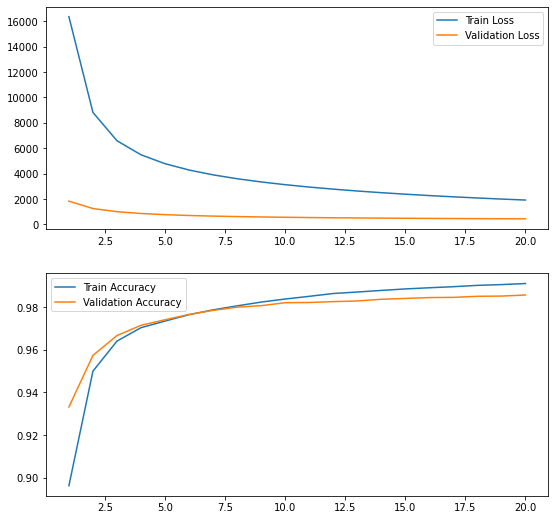

In [9]:
plot_loss_accuracy(trainLostList_Ada1,valLossList_Ada1,trainAccList_Ada1,valAccList_Ada1,num_epochs)

In [10]:
k=1
model2 = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_sgd1, trainAccList_sgd1, valLossList_sgd1, valAccList_sgd1  = train_model(model2, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device,lr = learn_rate, lr_scheduler=None, updateWManually=False)


Training on cuda:0
Epoch 1 completed. Loss - total: 12028.8138 - average: 0.2005; Performance: 0.9247
TESTING - loss 1192.9042333364487 - performance 0.9563
Epoch 2 completed. Loss - total: 5756.6509 - average: 0.0959; Performance: 0.9680
TESTING - loss 838.1423621475697 - performance 0.9704
Epoch 3 completed. Loss - total: 4422.4239 - average: 0.0737; Performance: 0.9755
TESTING - loss 698.1647130548954 - performance 0.9760
Epoch 4 completed. Loss - total: 3713.5072 - average: 0.0619; Performance: 0.9799
TESTING - loss 622.4361211359501 - performance 0.9790
Epoch 5 completed. Loss - total: 3244.7946 - average: 0.0541; Performance: 0.9825
TESTING - loss 569.5749872550368 - performance 0.9801
Epoch 6 completed. Loss - total: 2898.0838 - average: 0.0483; Performance: 0.9849
TESTING - loss 534.1978939026594 - performance 0.9812
Epoch 7 completed. Loss - total: 2628.7489 - average: 0.0438; Performance: 0.9863
TESTING - loss 507.5469734221697 - performance 0.9816
Epoch 8 completed. Loss - t

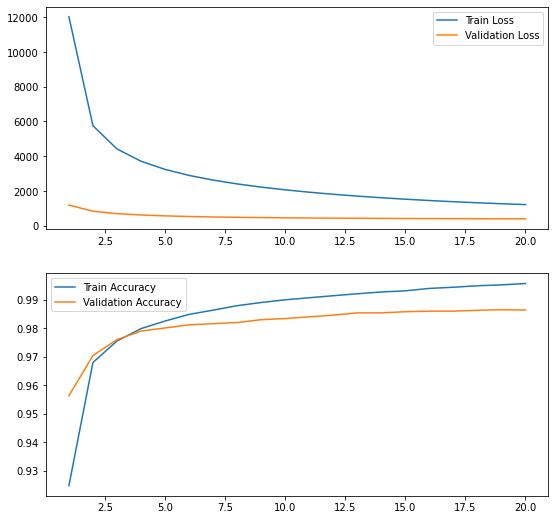

In [11]:
plot_loss_accuracy(trainLostList_sgd1,valLossList_sgd1,trainAccList_sgd1,valAccList_sgd1,num_epochs)

In [12]:
k=1
modelManual = MLPManual(k, learn_rate, loss_type, False)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch  = train_model_manually(modelManual, k, trainset, testset,                                                                                                                                        loss_type, loss_fn, num_epochs, batch_size, validate_model = True,
                                                                          device=device)

Training on cuda:0
Epoch 1 completed. Loss - total: 13803.9414 - average: 0.2301; Performance: 0.9590
TESTING - loss 690.4004605561495 - performance 0.9775
Epoch 2 completed. Loss - total: 3094.4983 - average: 0.0516; Performance: 0.9829
TESTING - loss 545.965219207108 - performance 0.9809
Epoch 3 completed. Loss - total: 2237.8220 - average: 0.0373; Performance: 0.9883
TESTING - loss 467.6519587673247 - performance 0.9838
Epoch 4 completed. Loss - total: 1733.9718 - average: 0.0289; Performance: 0.9917
TESTING - loss 425.4880168288946 - performance 0.9852
Epoch 5 completed. Loss - total: 1397.1416 - average: 0.0233; Performance: 0.9938
TESTING - loss 402.3420567661524 - performance 0.9861
Epoch 6 completed. Loss - total: 1155.1825 - average: 0.0193; Performance: 0.9955
TESTING - loss 390.07426226325333 - performance 0.9866
Epoch 7 completed. Loss - total: 978.9049 - average: 0.0163; Performance: 0.9966
TESTING - loss 380.54130774363875 - performance 0.9868
Epoch 8 completed. Loss - to

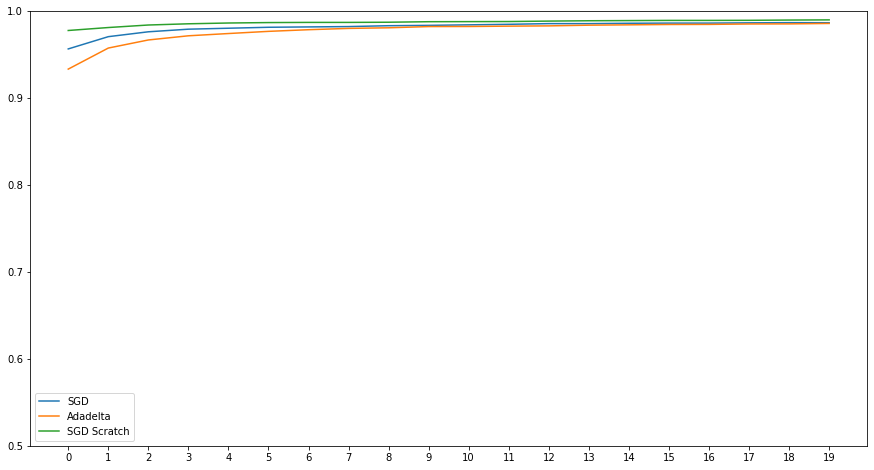

In [13]:
plt.figure(figsize=(15,8))
plt.ylim(0.5,1)
plt.plot(valAccList_sgd1, label="SGD")
plt.plot(valAccList_Ada1, label="Adadelta")
plt.plot(valAccList_sgd1_scratch, label= "SGD Scratch")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend();


### For k = 3

In [14]:
k = 3
model3 = MLP(k,"ReLU", loss_type)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_Ada3, trainAccList_Ada3, \
valLossList_Ada3, valAccList_Ada3  = train_model(model3, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41807.4227 - average: 0.6968; Performance: 0.4993
TESTING - loss 6939.16347694397 - performance 0.5037
Epoch 2 completed. Loss - total: 41595.0814 - average: 0.6933; Performance: 0.5096
TESTING - loss 6901.65050983429 - performance 0.5311
Epoch 3 completed. Loss - total: 41104.7492 - average: 0.6851; Performance: 0.5518
TESTING - loss 6772.260009765625 - performance 0.5739
Epoch 4 completed. Loss - total: 40048.9185 - average: 0.6675; Performance: 0.6005
TESTING - loss 6527.0262451171875 - performance 0.6226
Epoch 5 completed. Loss - total: 38322.9656 - average: 0.6387; Performance: 0.6444
TESTING - loss 6229.433446884155 - performance 0.6534
Epoch 6 completed. Loss - total: 36620.9883 - average: 0.6103; Performance: 0.6697
TESTING - loss 5932.218555450439 - performance 0.6805
Epoch 7 completed. Loss - total: 35224.0732 - average: 0.5871; Performance: 0.6822
TESTING - loss 5771.530801773071 - performance 0.6849
Epoch 8 completed. Loss

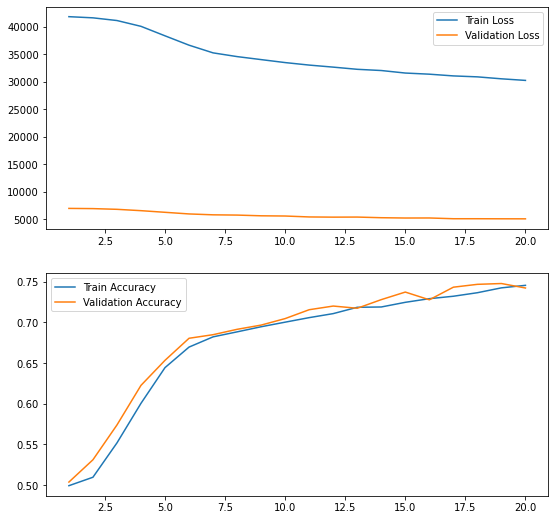

In [15]:
plot_loss_accuracy(trainLostList_Ada3,valLossList_Ada3,trainAccList_Ada3,valAccList_Ada3,num_epochs)

In [16]:
model4 = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_sgd3, trainAccList_sgd3, valLossList_sgd3, valAccList_sgd3  = train_model(model4, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None)

Training on cuda:0
Epoch 1 completed. Loss - total: 41738.3978 - average: 0.6956; Performance: 0.5071
TESTING - loss 6928.519487380981 - performance 0.5108
Epoch 2 completed. Loss - total: 41357.5751 - average: 0.6893; Performance: 0.5273
TESTING - loss 6820.025657653809 - performance 0.5429
Epoch 3 completed. Loss - total: 39659.7870 - average: 0.6610; Performance: 0.5915
TESTING - loss 6355.269735336304 - performance 0.6385
Epoch 4 completed. Loss - total: 36922.7215 - average: 0.6154; Performance: 0.6496
TESTING - loss 5901.196043968201 - performance 0.6728
Epoch 5 completed. Loss - total: 35164.1090 - average: 0.5861; Performance: 0.6712
TESTING - loss 5654.423001289368 - performance 0.6889
Epoch 6 completed. Loss - total: 34011.4044 - average: 0.5669; Performance: 0.6881
TESTING - loss 5601.3707065582275 - performance 0.6986
Epoch 7 completed. Loss - total: 33514.0231 - average: 0.5586; Performance: 0.6932
TESTING - loss 5474.26721572876 - performance 0.7016
Epoch 8 completed. Los

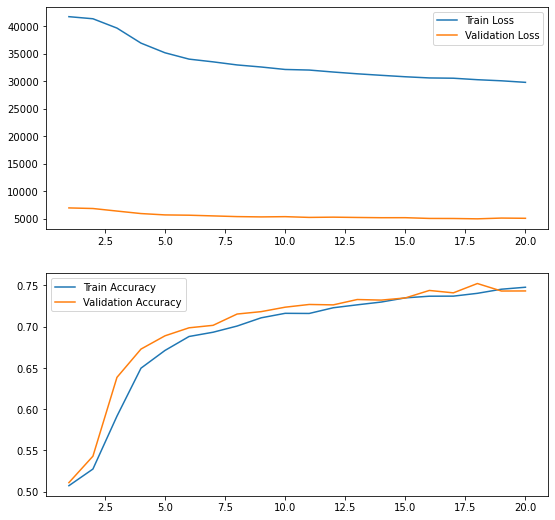

In [17]:
plot_loss_accuracy(trainLostList_sgd3, valLossList_sgd3, trainAccList_sgd3, valAccList_sgd3, num_epochs)

In [18]:
k=3
modelManual3 = MLPManual(k, learn_rate, loss_type, False)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, validate_model = True, device=device)

Training on cuda:0
Epoch 1 completed. Loss - total: 55380.5664 - average: 0.9230; Performance: 0.5097
TESTING - loss 6901.363296508789 - performance 0.5263
Epoch 2 completed. Loss - total: 40905.2773 - average: 0.6818; Performance: 0.5418
TESTING - loss 6689.475208282471 - performance 0.5635
Epoch 3 completed. Loss - total: 39261.4219 - average: 0.6544; Performance: 0.5860
TESTING - loss 6332.785129547119 - performance 0.6146
Epoch 4 completed. Loss - total: 37140.5703 - average: 0.6190; Performance: 0.6411
TESTING - loss 5961.82293510437 - performance 0.6610
Epoch 5 completed. Loss - total: 35209.5273 - average: 0.5868; Performance: 0.6687
TESTING - loss 5765.724714279175 - performance 0.6823
Epoch 6 completed. Loss - total: 34326.1172 - average: 0.5721; Performance: 0.6821
TESTING - loss 5574.236890792847 - performance 0.6862
Epoch 7 completed. Loss - total: 33812.2734 - average: 0.5635; Performance: 0.6855
TESTING - loss 5488.016585350037 - performance 0.6980
Epoch 8 completed. Loss

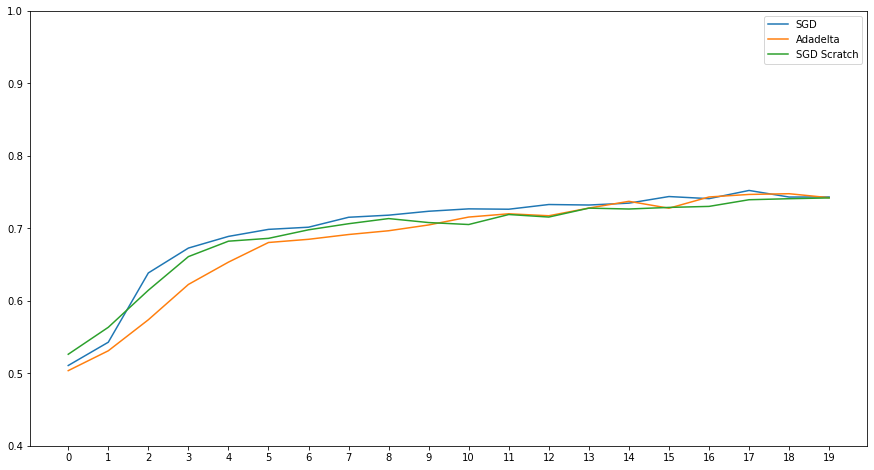

In [19]:
plt.figure(figsize=(15,8))
plt.ylim(0.4,1)
plt.plot(valAccList_sgd3, label="SGD")
plt.plot(valAccList_Ada3, label="Adadelta")
plt.plot(valAccList_sgd3_scratch, label= "SGD Scratch")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend();

### Try with the same weights

In [20]:
k = 3
modelx = MLP(k, "ReLU", loss_type).to(device)

w1 = copy.deepcopy(modelx.state_dict()["layer1.weight"]).to(device)
w2 = copy.deepcopy(modelx.state_dict()["layer2.weight"]).to(device)

optimizer = torch.optim.SGD(modelx.parameters(), lr=learn_rate)

trainLostList_sgd3_w, trainAccList_sgd3_w, valLossList_sgd3_w, valAccList_sgd3_w  = train_model(modelx, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr=learn_rate, lr_scheduler=None, updateWManually=True)

Training on cuda:0
Epoch 1 completed. Loss - total: 41778.3218 - average: 0.6963; Performance: 0.5013
TESTING - loss 6930.888833999634 - performance 0.5087
Epoch 2 completed. Loss - total: 41530.9250 - average: 0.6922; Performance: 0.5149
TESTING - loss 6882.830497741699 - performance 0.5329
Epoch 3 completed. Loss - total: 40163.9290 - average: 0.6694; Performance: 0.5792
TESTING - loss 6407.320203781128 - performance 0.6194
Epoch 4 completed. Loss - total: 36907.4968 - average: 0.6151; Performance: 0.6528
TESTING - loss 5927.736554145813 - performance 0.6663
Epoch 5 completed. Loss - total: 34988.6192 - average: 0.5831; Performance: 0.6741
TESTING - loss 5662.153710365295 - performance 0.6910
Epoch 6 completed. Loss - total: 34096.8855 - average: 0.5683; Performance: 0.6875
TESTING - loss 5607.882064819336 - performance 0.6968
Epoch 7 completed. Loss - total: 33454.9026 - average: 0.5576; Performance: 0.6945
TESTING - loss 5409.515613555908 - performance 0.7089
Epoch 8 completed. Los

In [21]:
modelManualx = MLPManual(k, learn_rate, loss_type, (w1.t(),w2.t()))
trainLostList_sgd3_scratch_w, trainAccList_sgd3_scratch_w, \
valLossList_sgd3_scratch_w, valAccList_sgd3_scratch_w  = train_model_manually(modelManualx, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, validate_model = True, device=device)

Training on cuda:0
Epoch 1 completed. Loss - total: 41756.8516 - average: 0.6959; Performance: 0.5040
TESTING - loss 6981.024379730225 - performance 0.5079
Epoch 2 completed. Loss - total: 41483.1523 - average: 0.6914; Performance: 0.5210
TESTING - loss 6855.932504653931 - performance 0.5464
Epoch 3 completed. Loss - total: 39897.3594 - average: 0.6650; Performance: 0.5863
TESTING - loss 6516.033529281616 - performance 0.6051
Epoch 4 completed. Loss - total: 36768.9805 - average: 0.6128; Performance: 0.6530
TESTING - loss 5962.804061889648 - performance 0.6610
Epoch 5 completed. Loss - total: 34967.2578 - average: 0.5828; Performance: 0.6738
TESTING - loss 5682.060827255249 - performance 0.6899
Epoch 6 completed. Loss - total: 33956.7656 - average: 0.5659; Performance: 0.6898
TESTING - loss 5469.778503417969 - performance 0.7096
Epoch 7 completed. Loss - total: 33487.1016 - average: 0.5581; Performance: 0.6966
TESTING - loss 5504.452655792236 - performance 0.7081
Epoch 8 completed. Los

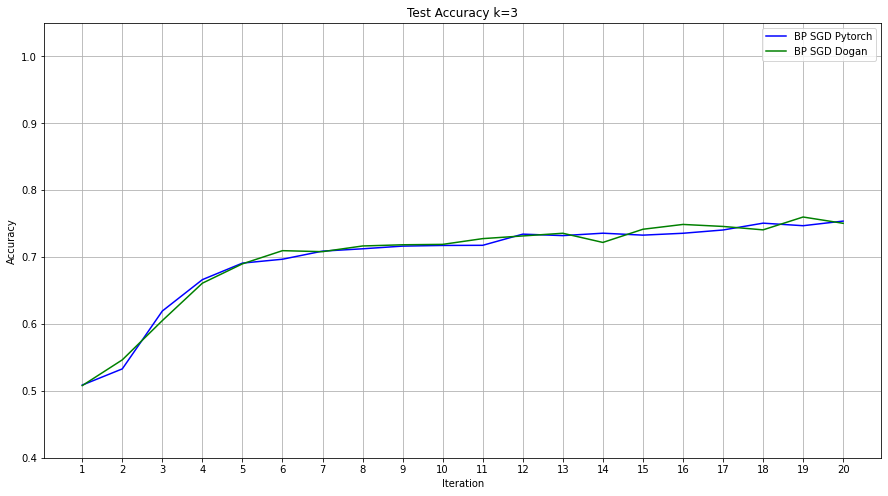

In [22]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21),valAccList_sgd3_w, color = "blue", label = "BP SGD Pytorch")
plt.plot(range(1,21),valAccList_sgd3_scratch_w, color = "green", label = "BP SGD Dogan")

plt.ylim(0.4,1.05)
plt.title("Test Accuracy k=3")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.grid(True)

plt.savefig("doganVSPytorch.png")

plt.show();

# They are gonna be different, because I recreate the data every epoch
# Even without recreating, results are different?

Activation: ReLU
Training on cuda:0
Epoch 1 completed. Loss - total: 41770.3596 - average: 0.6962; Performance: 0.5044
TESTING - loss 6947.681088447571 - performance 0.5012
Epoch 2 completed. Loss - total: 41554.8493 - average: 0.6926; Performance: 0.5168
TESTING - loss 6897.434184074402 - performance 0.5210
Epoch 3 completed. Loss - total: 41065.6003 - average: 0.6844; Performance: 0.5524
TESTING - loss 6772.2439641952515 - performance 0.5670
Epoch 4 completed. Loss - total: 39918.5319 - average: 0.6653; Performance: 0.5984
TESTING - loss 6517.611164093018 - performance 0.6254
Epoch 5 completed. Loss - total: 38196.5080 - average: 0.6366; Performance: 0.6444
TESTING - loss 6207.585418701172 - performance 0.6512
Epoch 6 completed. Loss - total: 36543.3814 - average: 0.6091; Performance: 0.6663
TESTING - loss 5934.644995689392 - performance 0.6767
Epoch 7 completed. Loss - total: 35258.7834 - average: 0.5876; Performance: 0.6805
TESTING - loss 5785.404953956604 - performance 0.6875
Epoc

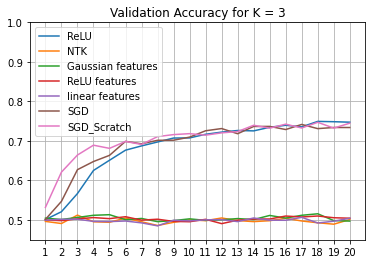

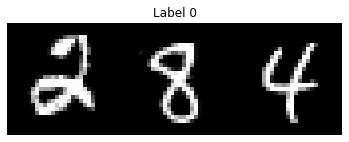

In [23]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20
loss_type = "Binary Cross Entropy"

fig = plt.figure(figsize=(15,9))
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD", "SGD_Scratch"]:
    if activation != "SGD_Scratch":
        model = MLP(K, activation, loss_type)
        if "features" in activation:
            # deactivate the first layer
            optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
        elif "NTK" in activation:
            paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
            optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
        elif "SGD" in activation:
            optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
        else:
            optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

        print("Activation:",activation)

        trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_type, loss_fn, optimizer, num_epochs,
                                                                            batch_size, validate_model = True, performance=accuracy,
                                                                            device="cuda:0", lr_scheduler=None)
    else:
        print("Activation:",activation)
        modelManual3 = MLPManual(K, learn_rate, loss_type, False)

        trainLostList, trainAccList, valLossList, valAccList  = train_model_manually(modelManual3, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                  batch_size, validate_model = True, device=device)

    plotValAccuracy(valAccList, num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper